##ZERO OFFSET SECTION Reverse Time Depth MIGRATION - Finite Diferences full scalar wave equation ##

Using synthetic velocity model from:

**Dan D. Kosloff* and Edip Baysah
Migration with the full acoustic wave equation 
GEOPHYSICS. VOL. 48. NO. 6 (JUNE 1981) P. 677-687.**

The approach here presented is different from that of Kosloff and Baysah
that used a scalar solution (density is constant) based in a Fourier Transformation in time and Runge-kutte that I need to understand better rsrs...

Here we use explicit finite diferences for space and time calculations.

###We use as input a zero-offset section nmo corrected###

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


###Loading back the results of the previous simulation###
### Loading the nmo stacked zero-offset section ###

We gonna load the stacked section previously created with vrms velocity

The artifacts presented in this zero-offset section is due the complexity of velocity distribution

(bookmark:Fatiando) -> /home/andre/PycharmProjects/fatiando
/home/andre/PycharmProjects/fatiando
/home/andre/PycharmProjects
(848, 268)


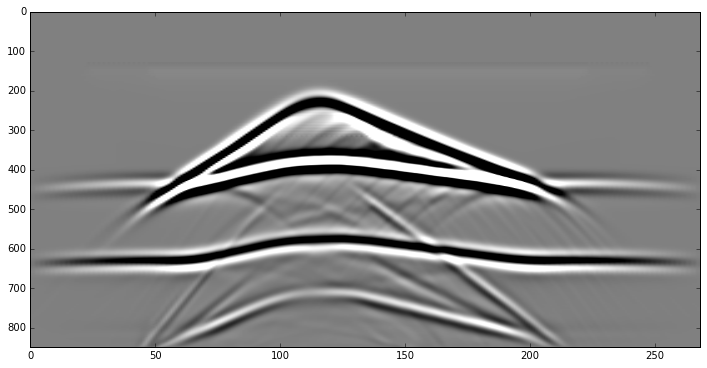

In [4]:
%cd Fatiando
from fatiando.vis import mpl
%cd ..
import numpy as np
cmps_stacked = np.load('cmp_stacked_01_12_2015s.npy')
print cmps_stacked.shape
figure(figsize=(12,6))
sim_dt=0.00433034793813
mpl.seismic_image(cmps_stacked, dt=1, vmin=-0.01, vmax=0.01, aspect='auto')

###Getting index coordinates of CMPS###

Getting the previous parameters for source and dt
The dt will be good since it was enough for the previous 

dt = 0.00433034793813

Dsource = 100.0
Dstations = 100.0

Starting shotting at x=5000
Shotting 100 shots

70 stations
30 fold

3500 max offset each side

Now lets convert it back to the index positons of the velocity model

In [5]:
# 3225 to 16575 by 50
# 50 dx becomes aproximatelly 
icmps = [ 64+i for i in xrange(268)]

### Load the exact velocity model ###

(bookmark:Fatiando) -> /home/andre/PycharmProjects/fatiando
/home/andre/PycharmProjects/fatiando
/home/andre/PycharmProjects
(160, 400)


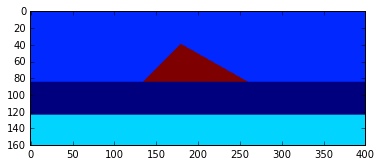

In [6]:
%cd Fatiando
%cd ..
from PIL import Image
import numpy as np
img = Image.open('wedge.tif')
img.load()
img = img.convert('I') # gray scale, convert format
data  = np.asarray(img, dtype=np.float32)
data[:][data[:] == 255.] = 2500.0 # overburden
data[:][data[:] == 0. ] = 3500 # the triangle
data[:][data[:] == 146.] = 2300.0 # the first slab bellow the triangle
data[:][data[:] == 36.] = 2700.0 # the last slab
cshape = data.shape
print cshape
imshow(data)

###Now get cmp positions of the velocity to create the depth velocity model for migration###

(160, 268)


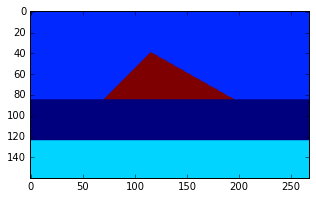

In [7]:
vmig = data[:, icmps]
vshape = vmig.shape
print vshape
figure(figsize=(5,5))
imshow(vmig, origin='upper')

### Basic parameters for zero-offset reverse modeling###

###Get those from the original FD simulation###

In [8]:
dx = 50. # spacing between cmps
dz = 25. # still the same from simulation
area = [0, vshape[1]*dx, 0, vshape[0]*dz]
vmig = vmig/2. # half velocity due zero-offset section aproximation
dt = sim_dt
maxit = 848
snapshots = 1 # every 3 iterations plots one

### Run the Reverse Time Simulation with the zero-offset stack section as boundary conditions at z=0 ###

In [9]:
%cd Fatiando
from fatiando.seismic import migration
rtmsimulation = migration.rt_scalar(vmig, area, dt, maxit, cmps_stacked, snapshot=1, padding=50)
import numpy as np
movie = np.zeros(((maxit/snapshots)+2, vshape[0], vshape[1]))
i = 0
for t, u  in rtmsimulation:
    movie[i] = u
    sys.stdout.write("\rprogressing .. %.1f%% time %.3f"%(100.0*float(t)/maxit, (dt*t)))
    sys.stdout.flush()
    i += 1
sys.stdout.write("\niteration %d"%(i))

(bookmark:Fatiando) -> /home/andre/PycharmProjects/fatiando
/home/andre/PycharmProjects/fatiando
progressing .. 99.9% time 3.668
iteration 848

### Plot some of the reversed time simulation results ###

###The last one is the RTM depth migrated section ###

(bookmark:Fatiando) -> /home/andre/PycharmProjects/fatiando
/home/andre/PycharmProjects/fatiando


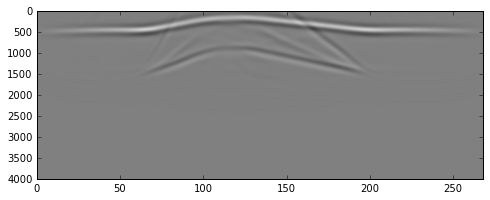

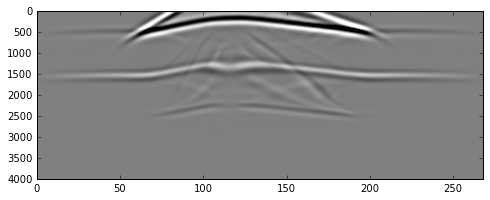

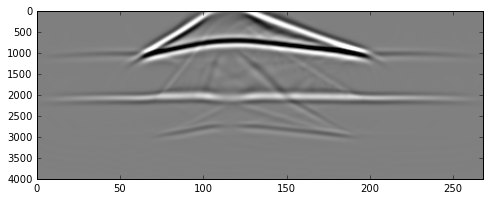

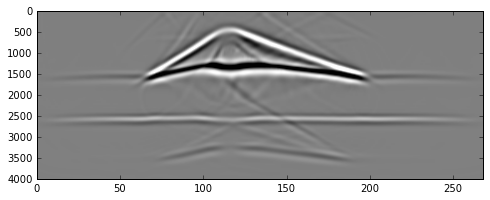

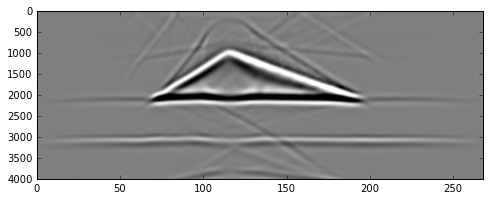

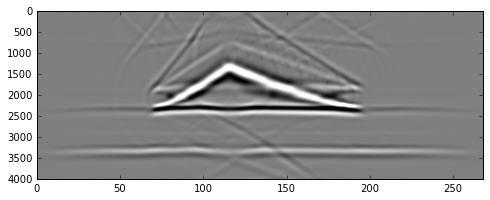

In [10]:
# there is no need for that much of depth
%cd Fatiando
from fatiando.vis import mpl

def pstep(iter):
    figure(figsize=(8,3))
    tmv = movie[iter]
    mpl.seismic_image(tmv, dt=25, vmin=-0.003, vmax=0.003, aspect='auto') 
    #imshow(tmv, cmap=mpl.cm.gray_r, vmin=-.1, vmax=.1, extent=area, origin='lower')

pstep(300)
pstep(500)
pstep(600)
pstep(700)
pstep(800)
pstep(847)

**Certainlly there is a lot of numerical dispersion, non-cut of head-difracted waves and specially artifacts (reflected waves during the reverse time steps)**

**Despite of that the migrated model reproduces the exactly original geometry !!**

The reflected waves during the reverse time steps are a commom problem mention by Koslov ... 

Those artifacts can be dramattically reduced if the Gazdag 1981 psedospectral upward one wave equation is used instead. 
Altough there are many other options like filtering in the z direction and other ...

Gazdag is the most usable for RTM specially pre-stack

Koslov migh give a good resul too...?? who knows??
Better spend time with pre-stack RTM no???